In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
%matplotlib notebook

In [2]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

df1 = web.DataReader("TSLA", 'yahoo', start, end)
#df1.reset_index(inplace=True)
#df1.set_index("Date", inplace=True)
df1.to_csv('TSLA.csv')


ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/TSLA/history?period1=1420065000&period2=1542666599&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000017161CAD470>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

                  High         Low        Open       Close   Volume  \
Date                                                                  
2014-12-31  225.679993  222.250000  223.089996  222.410004  2402100   
2015-01-02  223.250000  213.259995  222.869995  219.309998  4764400   
2015-01-05  216.500000  207.160004  214.550003  210.089996  5368500   
2015-01-06  214.199997  204.210007  210.059998  211.279999  6261900   
2015-01-07  214.779999  209.779999  213.350006  210.949997  2968400   

             Adj Close  
Date                    
2014-12-31  222.410004  
2015-01-02  219.309998  
2015-01-05  210.089996  
2015-01-06  211.279999  
2015-01-07  210.949997  


<IPython.core.display.Javascript object>


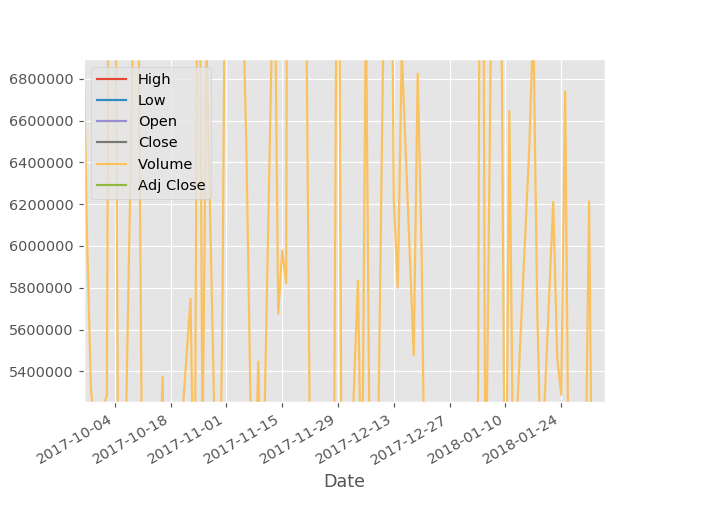

In [3]:
%matplotlib notebook
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
print(df.head())
df.plot()
plt.show()

In [4]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean() # 100 days moving average
print(df.head())
print(df.tail())

                  High         Low        Open       Close   Volume  \
Date                                                                  
2014-12-31  225.679993  222.250000  223.089996  222.410004  2402100   
2015-01-02  223.250000  213.259995  222.869995  219.309998  4764400   
2015-01-05  216.500000  207.160004  214.550003  210.089996  5368500   
2015-01-06  214.199997  204.210007  210.059998  211.279999  6261900   
2015-01-07  214.779999  209.779999  213.350006  210.949997  2968400   

             Adj Close  100ma  
Date                           
2014-12-31  222.410004    NaN  
2015-01-02  219.309998    NaN  
2015-01-05  210.089996    NaN  
2015-01-06  211.279999    NaN  
2015-01-07  210.949997    NaN  
                  High         Low        Open       Close   Volume  \
Date                                                                  
2018-11-12  349.779999  330.339996  348.369995  331.279999  6941500   
2018-11-13  344.700012  332.200012  333.160004  338.730011  54486

                  High         Low        Open       Close   Volume  \
Date                                                                  
2014-12-31  225.679993  222.250000  223.089996  222.410004  2402100   
2015-01-02  223.250000  213.259995  222.869995  219.309998  4764400   
2015-01-05  216.500000  207.160004  214.550003  210.089996  5368500   
2015-01-06  214.199997  204.210007  210.059998  211.279999  6261900   
2015-01-07  214.779999  209.779999  213.350006  210.949997  2968400   

             Adj Close       100ma  
Date                                
2014-12-31  222.410004  222.410004  
2015-01-02  219.309998  220.860001  
2015-01-05  210.089996  217.269999  
2015-01-06  211.279999  215.772499  
2015-01-07  210.949997  214.807999  


<IPython.core.display.Javascript object>


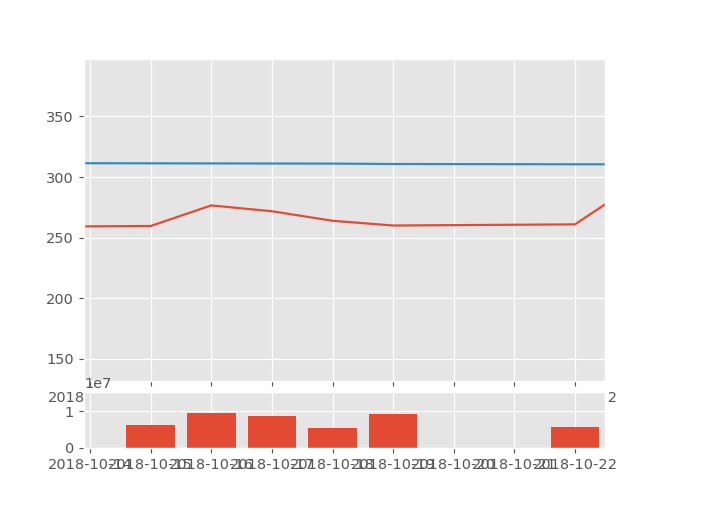

In [5]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()  #  changed the minimum periods parameter to 0
print(df.head())
%matplotlib notebook
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()


In [9]:

from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())


                  open        high         low       close
Date                                                      
2014-12-31  222.410004  222.410004  206.660004  206.660004
2015-01-10  202.210007  204.250000  191.869995  193.070007
2015-01-20  191.929993  206.550003  191.929993  205.199997
2015-01-30  203.600006  220.990005  203.600006  217.360001
2015-02-09  217.479996  217.479996  202.880005  204.460007


In [10]:
#df_ohlc = df_ohlc.reset_index()
# OR
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date        open        high         low       close
0  735598.0  222.410004  222.410004  206.660004  206.660004
1  735608.0  202.210007  204.250000  191.869995  193.070007
2  735618.0  191.929993  206.550003  191.929993  205.199997
3  735628.0  203.600006  220.990005  203.600006  217.360001
4  735638.0  217.479996  217.479996  202.880005  204.460007


<IPython.core.display.Javascript object>


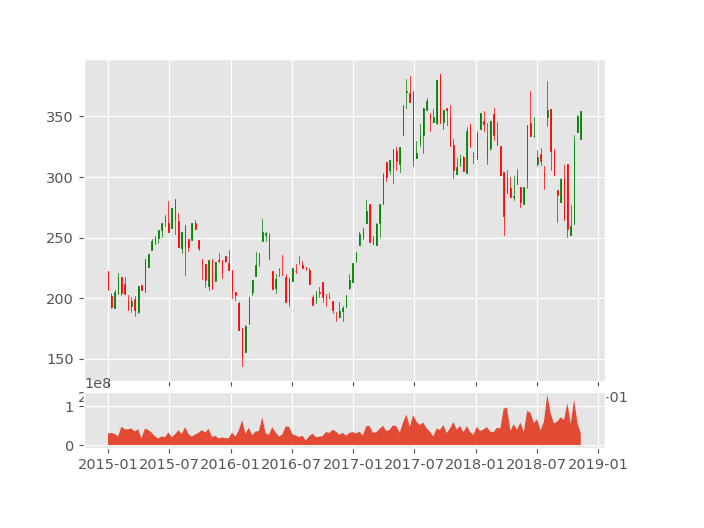

<function matplotlib.pyplot.show(*args, **kw)>

In [14]:
%matplotlib notebook
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()   #It converts the axis from the raw mdate numbers to dates
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show

